## Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("Iris.csv") containing:

1. Four features and one target column 
2. Convert the target column into 1=Setosa and 0!=Setosa

You will build a simple algorithm that can correctly classify species Setosa or not-Setosa.


### Import packages


In [ ]:
import seaborn as sns
import pandas as pd
import copy
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


: 

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Access data

In [ ]:
! cp /content/drive/MyDrive/Stat601Data/iris.csv .

### Load the CSV into a DataFrame:

In [ ]:
df = pd.read_csv('iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### Create a target variable

In [ ]:
# In the original dataset, we have 3 different species
df['target'] = np.where(df['variety']=="Setosa", 1, 0)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,target
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1


In [ ]:
# Drop unused features.
df = df.drop(columns=['variety'])
df.head()

,sepal.length,sepal.width,petal.length,petal.width,target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Inspect the data
 There are no categorical variables. No missing data

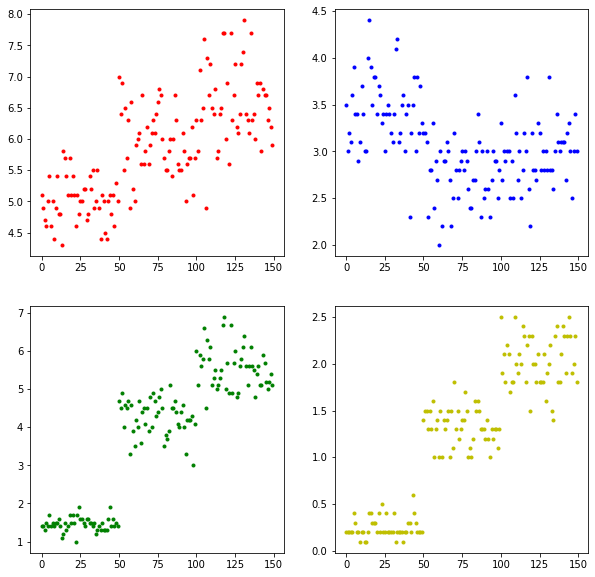

In [ ]:
plt.figure(figsize=(10,10))
# number of row, number of columns and which plot
plt.subplot(2,2,1)
plt.plot(df['sepal.length'],'r.')
plt.subplot(2,2,2)
plt.plot(df['sepal.width'],'b.')
plt.subplot(2,2,3)
plt.plot(df['petal.length'],'g.')
plt.subplot(2,2,4)
plt.plot(df['petal.width'],'y.')

Text(0.5, 1.0, 'mu = 5.843333333333334')

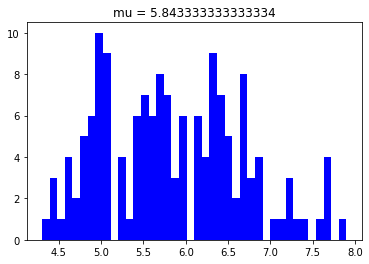

In [ ]:
mu=df['sepal.length'].mean()
sigma=df['sepal.length'].std()
plt.hist(df['sepal.length'], bins=40, facecolor='blue');
plt.title('mu = '+str(mu))

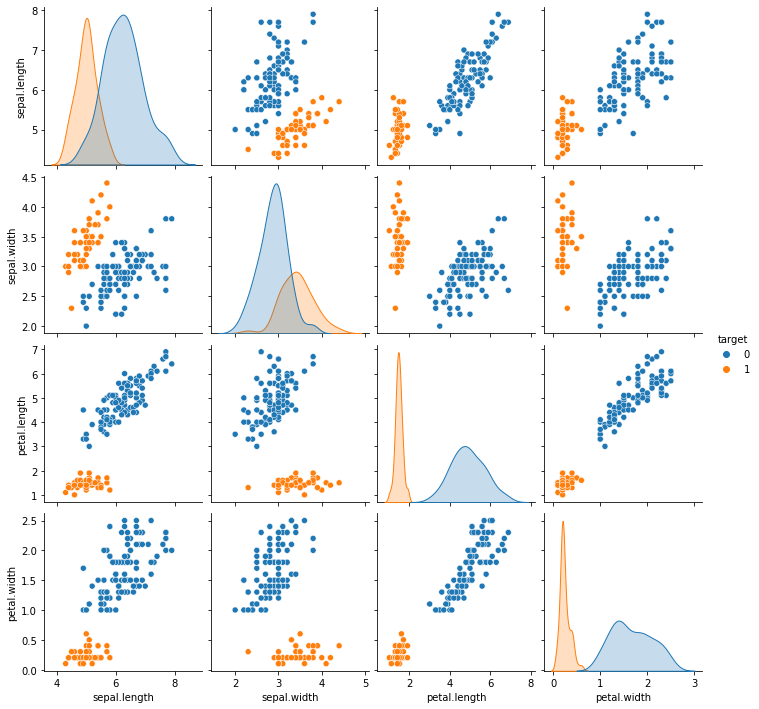

In [ ]:
sns.pairplot(df, hue='target')

### Split data into training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=123)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")
print(df.shape)

No. of training examples: 120
No. of testing examples: 30
(150, 5)


### Make sure the correct dimension of the data

In [ ]:
x_train_0=np.array(training_data.iloc[:,0:4])
#print(x_train)
y_train =np.array(training_data.iloc[:,4:]).T
x_test_0 =np.array(testing_data.iloc[:, 0:4])
y_test=np.array(testing_data.iloc[:,4:]).T

print(x_train_0.shape)
print(y_train.shape)
print(x_test_0.shape)
print(y_test.shape)

(120, 4)
(1, 120)
(30, 4)
(1, 30)


In [ ]:
print(x_train_0)

[[7.4 2.8 6.1 1.9]
 [6.  2.2 5.  1.5]
 [4.7 3.2 1.6 0.2]
 [5.1 3.5 1.4 0.2]
 [6.  2.2 4.  1. ]
 [5.  2.3 3.3 1. ]
 [7.9 3.8 6.4 2. ]
 [5.4 3.9 1.7 0.4]
 [5.4 3.9 1.3 0.4]
 [5.8 2.7 3.9 1.2]
 [5.  2.  3.5 1. ]
 [5.  3.2 1.2 0.2]
 [6.8 3.2 5.9 2.3]
 [6.7 3.  5.2 2.3]
 [5.8 2.7 5.1 1.9]
 [5.8 2.8 5.1 2.4]
 [6.3 3.4 5.6 2.4]
 [5.5 2.3 4.  1.3]
 [5.1 3.8 1.5 0.3]
 [4.4 3.  1.3 0.2]
 [6.5 3.2 5.1 2. ]
 [5.1 3.3 1.7 0.5]
 [4.9 3.1 1.5 0.1]
 [6.7 3.1 4.7 1.5]
 [6.1 3.  4.6 1.4]
 [5.5 2.5 4.  1.3]
 [5.7 2.6 3.5 1. ]
 [5.8 2.7 5.1 1.9]
 [6.7 3.1 4.4 1.4]
 [6.4 3.2 5.3 2.3]
 [4.5 2.3 1.3 0.3]
 [6.7 3.3 5.7 2.1]
 [5.7 3.  4.2 1.2]
 [5.1 3.7 1.5 0.4]
 [4.8 3.4 1.6 0.2]
 [6.3 2.9 5.6 1.8]
 [6.4 2.9 4.3 1.3]
 [7.7 2.8 6.7 2. ]
 [7.7 2.6 6.9 2.3]
 [5.1 3.8 1.9 0.4]
 [6.4 3.2 4.5 1.5]
 [5.5 2.4 3.7 1. ]
 [5.9 3.  5.1 1.8]
 [4.8 3.  1.4 0.1]
 [7.2 3.  5.8 1.6]
 [6.3 3.3 4.7 1.6]
 [7.  3.2 4.7 1.4]
 [5.  3.  1.6 0.2]
 [6.4 2.8 5.6 2.1]
 [6.3 2.5 5.  1.9]
 [5.  3.5 1.6 0.6]
 [4.9 3.  1.4 0.2]
 [6.1 2.8 4.

### Standardize the dataset
One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. 

In [ ]:
from numpy import linalg as LA
x_train_mean =np.mean(x_train_0, axis=0)
print(x_train_mean)
print(x_train_mean.shape)
x_train_norm =np.linalg.norm(x_train_0, axis=0) # default Frobenius Norm
print(x_train_norm)
x_train_1=((x_train_0-x_train_mean)/x_train_norm)
print(x_train_1.shape)
print(x_train_0.shape)
print(x_train_1[0,])
print(x_train_0[0,])
x_train=x_train_1.T


[5.86916667 3.04083333 3.82083333 1.22416667]
(4,)
[64.90215713 33.65546018 45.90784247 15.6598212 ]
(120, 4)
(120, 4)
[ 0.02358679 -0.00715585  0.04964656  0.04315716]
[7.4 2.8 6.1 1.9]


In [ ]:
x_test_mean =np.mean(x_test_0, axis=0)
print(x_test_mean)
print(x_test_mean.shape)
x_test_norm =np.linalg.norm(x_test_0, axis=0) # default Frobenius Norm
print(x_test_norm)
x_test_1=((x_test_0-x_test_mean)/x_test_norm)
print(x_test_1[0,])
print(x_test_0[0,])
x_test=x_test_1.T
print(x_test[0:4,0])

[5.74       3.12333333 3.50666667 1.1       ]
(4,)
[31.80503105 17.25427483 21.79862381  7.55645419]
[ 0.01760728 -0.03612631  0.06391841  0.05293488]
[6.3 2.5 4.9 1.5]
[ 0.01760728 -0.03612631  0.06391841  0.05293488]


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4, 120)
(1, 120)
(4, 30)
(1, 30)


### General Architecture of the learning algorithm

You will build a Logistic Regression, using a Neural Network mindset. 

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude


### Building parts of the algorithm 重要!!
The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### Sigmoid function
$sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$

In [ ]:
def sigmoid(z):
  s=1/(1+np.exp(-z))
  return s

### Initializing parameters
Initialize w as a vector of zeros, b as zero

In [ ]:
def initialize_parameters(dim):
  w=np.zeros((dim,1))
  b=0
  assert(w.shape==(dim,1))
  assert(isinstance(b,float) or isinstance(b,int))
  return w,b

### Forward and backward propagation
Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [ ]:
def propagate(w,b,X,Y):
  m=X.shape[1]
  #Forward Propagation(from X to Cost)
  A = sigmoid(np.dot(w.T, X) + b)                          # compute activation
  cost = -1./m* np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))    # compute cost
  #Backward Propagation(To find Gradient)
  dw = 1./m*np.dot(X, (A-Y).T)
  db = 1./m*np.sum(A-Y)
  cost = np.squeeze(np.array(cost))
  grads = {"dw": dw,"db": db}
  return grads, cost

### Optimization
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (#features, 1)
    b -- bias, a scalar
    X -- data of shape (#features, number of examples)
    Y -- true "label" vector 
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
       
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.


In [ ]:
# GRADED FUNCTION: optimize
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False): 
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)  
    costs = []   
    for i in range(num_iterations):     
        grads, cost = propagate(w, b, X, Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update parameters
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### Predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [ ]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w= w.reshape(X.shape[0], 1)
    
    # Compute vector "A" 
    A = sigmoid(np.dot(w.T, X) + b)
  
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
           
    return Y_prediction

### Merge all functions into a model
You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_parameters(X_train.shape[0])
    print("w.shape" + str(w.shape))
    print("X_train.shape " + str(X_train.shape))
    print("Y_train.shape "  + str(Y_train.shape))
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
logistic_regression = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

w.shape(4, 1)
X_train.shape (4, 120)
Y_train.shape (1, 120)
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.676566
Cost after iteration 200: 0.663577
Cost after iteration 300: 0.653374
Cost after iteration 400: 0.645332
Cost after iteration 500: 0.638966
Cost after iteration 600: 0.633901
Cost after iteration 700: 0.629851
Cost after iteration 800: 0.626591
Cost after iteration 900: 0.623949
Cost after iteration 1000: 0.621793
Cost after iteration 1100: 0.620018
Cost after iteration 1200: 0.618543
Cost after iteration 1300: 0.617305
Cost after iteration 1400: 0.616254
Cost after iteration 1500: 0.615353
Cost after iteration 1600: 0.614569
Cost after iteration 1700: 0.613879
Cost after iteration 1800: 0.613265
Cost after iteration 1900: 0.612709
train accuracy: 69.16666666666666 %
test accuracy: 56.666666666666664 %


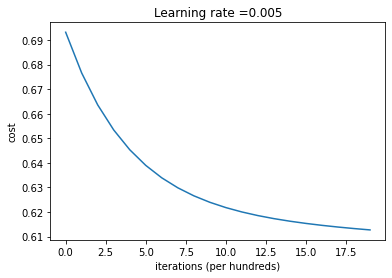

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression["learning_rate"]))
plt.show()


### Build a Feed Forward Neural Network, using ReLU and other activation fuctions